### Download the dataset form the kagglehub

In [26]:
import kagglehub

path = kagglehub.dataset_download("kolawale/focusing-on-mobile-app-or-website")

print("Path to dataset files:", path)

Path to dataset files: /home/breezy/.cache/kagglehub/datasets/kolawale/focusing-on-mobile-app-or-website/versions/1


### copy to the assets folder from cache

In [27]:
import os
import shutil

assets_path = os.path.join(os.getcwd(), "assets")

for item in os.listdir(path):
    source_file = os.path.join(path, item)
    destination_file = os.path.join(assets_path, item)
    if os.path.isdir(source_file):
        shutil.copytree(source_file, destination_file, dirs_exist_ok=True)
    else:
        shutil.copy(source_file, destination_file)


### import the libs

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### read the CSV

In [29]:
df = pd.read_csv("assets/Ecommerce Customers")


In [30]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


### Get the stat of dataset

In [32]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


### EDA

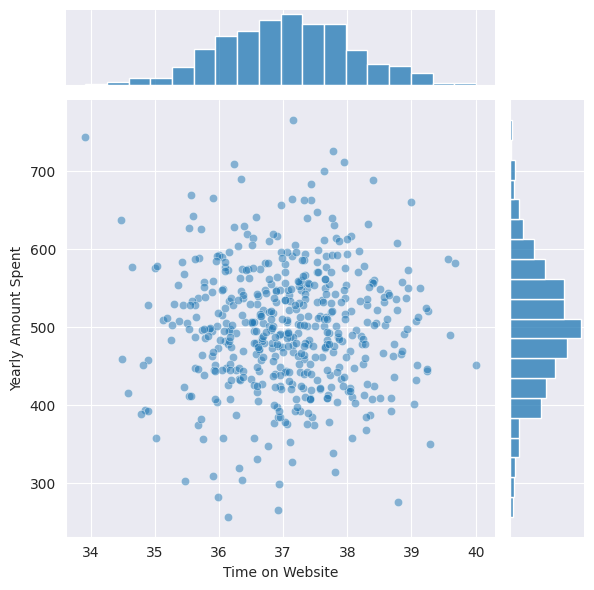

In [33]:
sns.jointplot(
    x="Time on Website",
    y="Yearly Amount Spent",
    data=df,
    alpha=0.5)

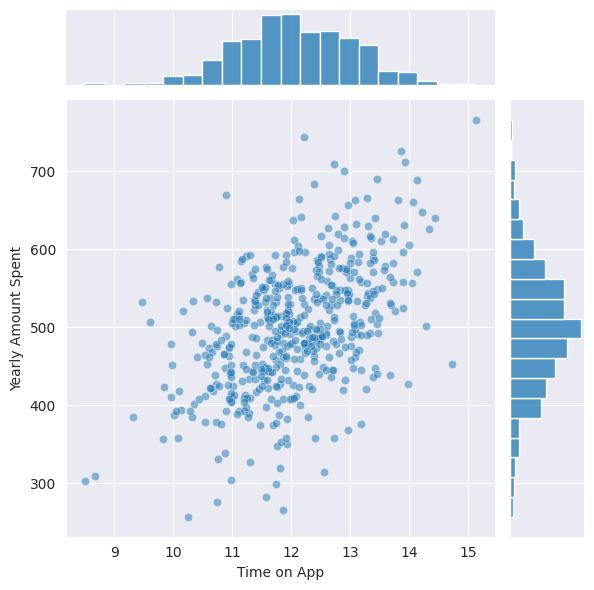

In [34]:
sns.jointplot(
    x="Time on App",
    y="Yearly Amount Spent",
    data=df,
    alpha=0.5)

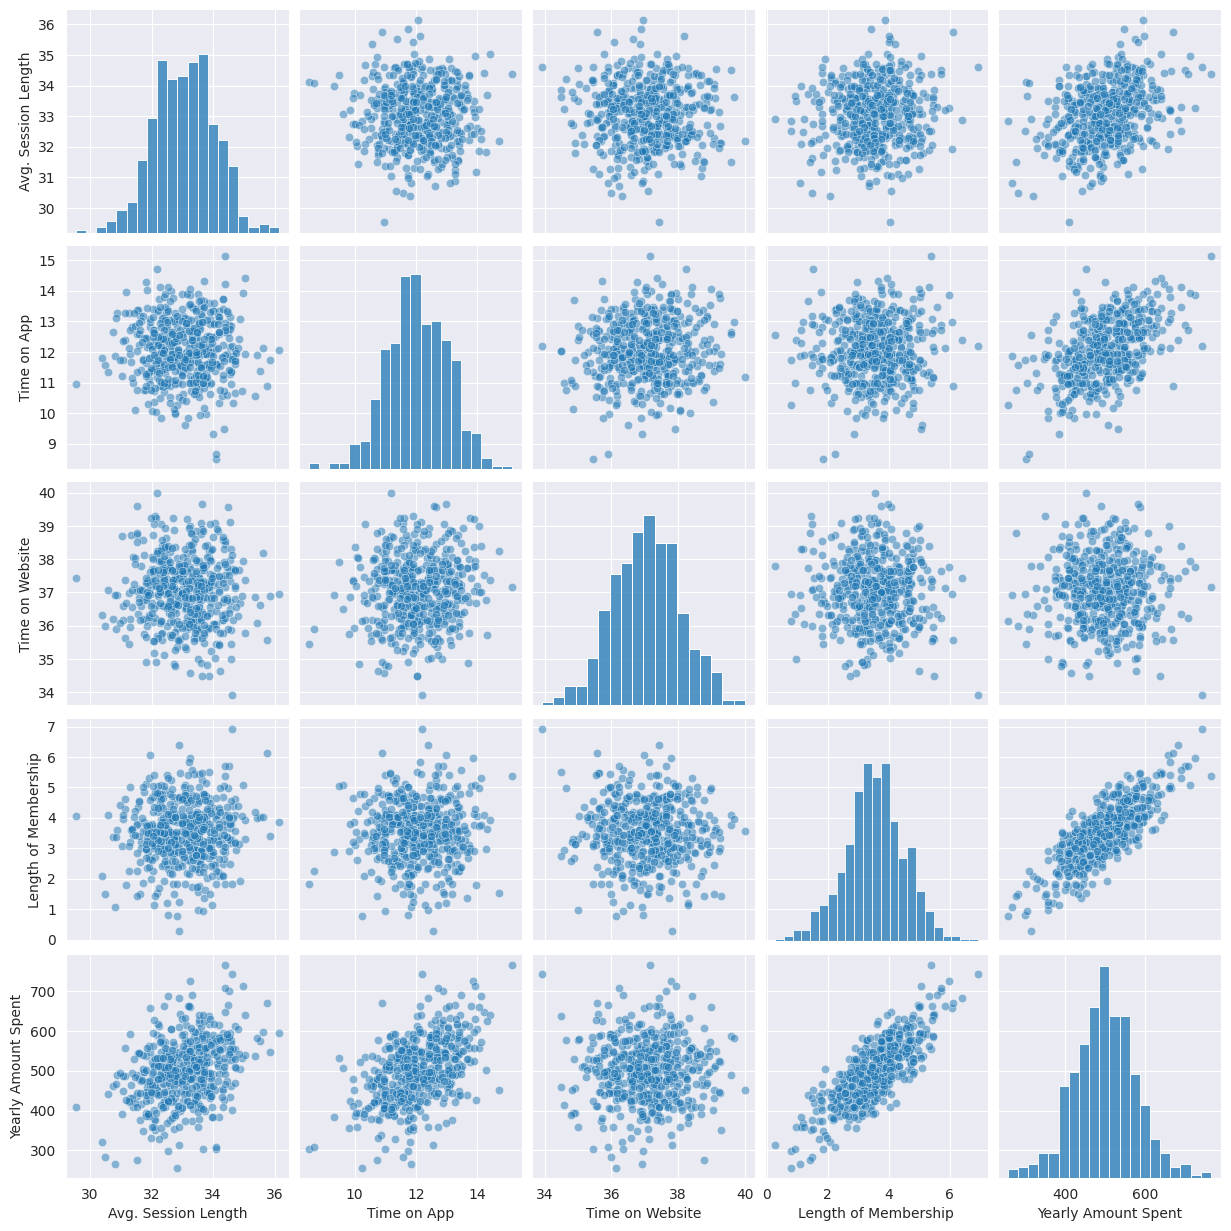

In [35]:
sns.pairplot(df, kind="scatter", plot_kws={"alpha": 0.5})

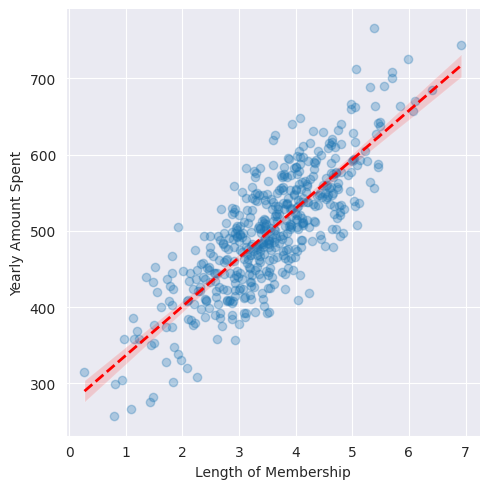

In [36]:
sns.lmplot(
    x="Length of Membership",
    y="Yearly Amount Spent",
    data=df,
    scatter_kws={"alpha": 0.3},
    line_kws={"color": "red", "linewidth": 2 , "linestyle": "--","alpha": 1},)

### scikit learn for split the dataset

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X = df[["Avg. Session Length","Time on App","Time on Website","Length of Membership"]]
y = df["Yearly Amount Spent"]

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42  )

In [40]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(350, 4) (150, 4) (350,) (150,)


### Train the model

Import the liner regression

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
lm = LinearRegression()
lm.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### these are the weight in the model
how they are important for this
So in reality, your linear model would look something like this:<br/>
###         y= ẞ<sub>0</sub> + ẞ<sub>1</sub>x<sub>1</sub> + ẞ<sub>2</sub>x<sub>2</sub> + ... + ẞ<sub>n</sub>x<sub>n</sub>

<B>Where every x_i represents a different variable and every ẞ_i represent important they are to the model.<B/>

### Metrics

In [43]:
lm.coef_

array([25.72425621, 38.59713548,  0.45914788, 61.67473243])

In [50]:
lm.intercept_

np.float64(-1050.6536746645725)

In [44]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=["Coef"])

In [45]:
print(cdf)

                           Coef
Avg. Session Length   25.724256
Time on App           38.597135
Time on Website        0.459148
Length of Membership  61.674732


### Predictions

In [46]:
prediction = lm.predict(X_test)

In [47]:
prediction

array([403.66993069, 542.57756289, 427.06591658, 502.02460425,
       410.12143559, 569.93442508, 531.93431341, 506.29650969,
       408.71870658, 473.97737105, 441.46912726, 425.33703059,
       425.1297229 , 527.61676714, 431.45684016, 424.0769184 ,
       575.76543296, 484.89856554, 458.35936863, 481.96502182,
       502.32441491, 513.63783554, 507.58877002, 646.57464283,
       450.24372141, 496.27043415, 556.40457807, 554.95630839,
       399.64237199, 325.84623136, 532.89783259, 478.12238702,
       501.05701845, 305.97335848, 505.77244448, 483.79591969,
       518.8331528 , 438.18241857, 456.71094234, 471.04609461,
       494.44008972, 445.31155755, 508.78802753, 501.04594193,
       488.83499673, 535.38079541, 595.20129802, 514.04714872,
       280.76758312, 433.10112367, 421.70823427, 481.23640152,
       584.71372272, 608.7748096 , 563.98513427, 494.72804869,
       394.52133407, 456.4197529 , 573.08767515, 499.6984241 ,
       512.83277025, 392.12434043, 480.05057697, 481.54

In [48]:
print(prediction.shape)
print(y_test.shape)

(150,)
(150,)


### Visualization

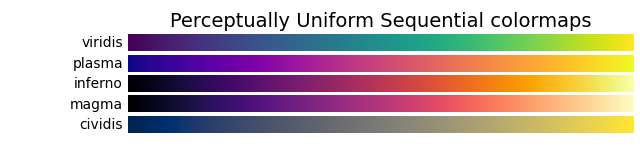
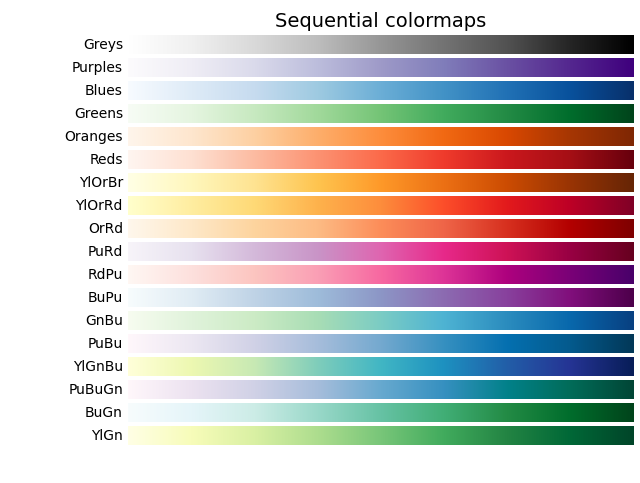
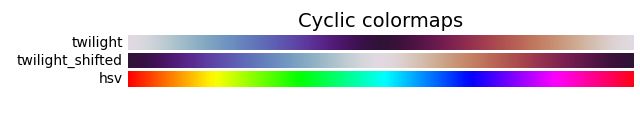

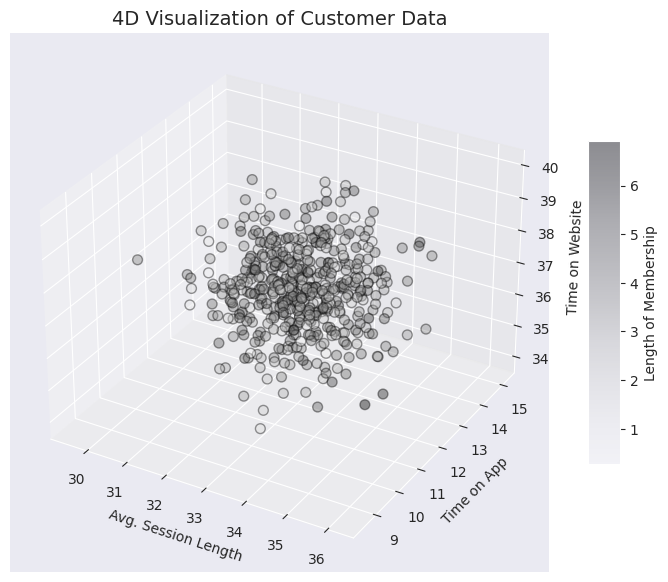

In [59]:
import matplotlib.pyplot as plt



x = df["Avg. Session Length"]
y = df["Time on App"]
z = df["Time on Website"]
c = df["Length of Membership"]  # 4th dimension (color) because human can see the 3 dimension

# Create figure
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

# Scatter plot (4D: X, Y, Z, Color)
sc = ax.scatter(
    x, y, z,
    c=c,
    cmap="Greys",# color map
    s=50,          # size of points
    alpha=0.4,     # transparency
    edgecolors="k" # black edges for clarity
)

# Axis labels
ax.set_xlabel("Avg. Session Length")
ax.set_ylabel("Time on App")
ax.set_zlabel("Time on Website")

# Colorbar for the 4th dimension
cbar = fig.colorbar(sc, ax=ax, shrink=0.6, aspect=10)
cbar.set_label("Length of Membership")

plt.title("4D Visualization of Customer Data", fontsize=14)
plt.show()


<p>4d graph is useless can't get the proper idea from this</p>

### check the prediction and Actual value in scatter plot

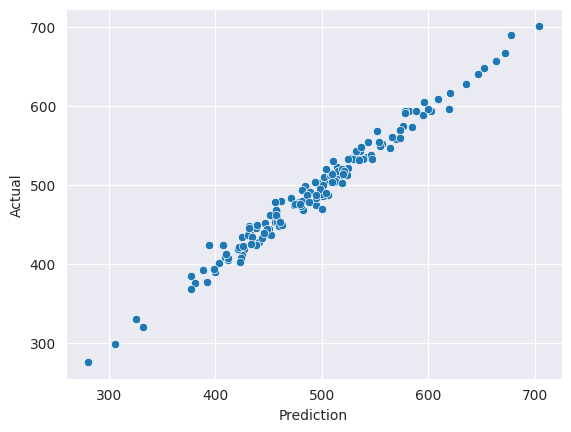

In [49]:
sns.scatterplot(x=prediction, y=y_test)
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

# 📊 Evaluation Metrics (Regression & Classification)

---

## 🔹 Regression Metrics

### 1. Mean Absolute Error (MAE)
$$
MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

- **How it works:** Averages the absolute differences between actual and predicted values.
- **Pros:** Easy to understand, not overly sensitive to outliers.
- **Cons:** Treats all errors equally (small and large).
- **Use case:** When you want a clear "average error" in original units.

---

### 2. Mean Squared Error (MSE)
$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

- **How it works:** Squares errors before averaging → large errors get more weight.
- **Pros:** Punishes big mistakes strongly. Useful for optimization (smooth gradient).
- **Cons:** Harder to interpret (squared units), very sensitive to outliers.
- **Use case:** Training models where large errors must be minimized.

---

### 3. Root Mean Squared Error (RMSE)
$$
RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

- **How it works:** Square root of MSE → brings error back to original units.
- **Pros:** Same units as target variable, interpretable.
- **Cons:** Still sensitive to outliers.
- **Use case:** When you want a balance between interpretability (like MAE) and penalty for big errors (like MSE).

---

## 🔹 Classification Metrics

## Confusion Matrix (layout)
|               | Predicted Positive | Predicted Negative |
|---------------|--------------------:|-------------------:|
| **Actual Positive** | TP                 | FN                |
| **Actual Negative** | FP                 | TN                |

*TP = True Positive, TN = True Negative, FP = False Positive, FN = False Negative*

### 1. Accuracy
$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

- **How it works:** Measures proportion of correct predictions.
- **Pros:** Simple, intuitive.
- **Cons:** Misleading if dataset is imbalanced.
- **Use case:** Balanced datasets, baseline performance measure.

---

### 2. Precision
$$
Precision = \frac{TP}{TP + FP}
$$

- **How it works:** Out of predicted positives, how many are correct?
- **Pros:** Useful when false positives are costly (e.g., spam detection).
- **Cons:** Doesn’t account for false negatives.
- **Use case:** Focus on quality of positive predictions.

---

### 3. Recall (Sensitivity / TPR)
$$
Recall = \frac{TP}{TP + FN}
$$

- **How it works:** Out of actual positives, how many did we catch?
- **Pros:** Useful when false negatives are costly (e.g., disease detection).
- **Cons:** Doesn’t care about false positives.
- **Use case:** Focus on capturing as many positives as possible.

---

### 4. F1 Score
$$
F1 = \frac{2 \times Precision \times Recall}{Precision + Recall}
$$

- **How it works:** Harmonic mean of Precision and Recall.
- **Pros:** Balances precision & recall. Good for imbalanced datasets.
- **Cons:** Ignores true negatives.
- **Use case:** When both false positives & false negatives matter.

---

## 🔹 Quick Summary Table

| Metric | Works On | Pros | Cons | Best Use Case |
|--------|----------|------|------|---------------|
| **MAE** | Regression | Simple, interpretable | Equal penalty, ignores variance | Avg. error in original units |
| **MSE** | Regression | Strong penalty for big errors | Squared units, outlier-sensitive | Model training, optimization |
| **RMSE** | Regression | Same units as target | Outlier-sensitive | Compare models in target scale |
| **Accuracy** | Classification | Simple, overall correctness | Bad for imbalance | Balanced datasets |
| **Precision** | Classification | Controls false positives | Ignores false negatives | Spam detection, quality focus |
| **Recall** | Classification | Controls false negatives | Ignores false positives | Medical tests, safety-critical |
| **F1** | Classification | Balance between P & R | Ignores TN | Imbalanced datasets |

---

✅ **Tip:**
- Use **MAE/RMSE** for regression.
- Use **Accuracy** for balanced classification.
- Use **Precision/Recall/F1** for imbalanced classification depending on error cost.


### Check the MSE and MAE

In [64]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error

In [65]:
print("Mean Absolute Error:",mean_absolute_error(y_test,prediction))
print("Mean squared error: ",mean_squared_error(y_test,prediction))
print("Root Mean squared error: ",root_mean_squared_error(y_test,prediction))

Mean Absolute Error: 8.426091641432116
Mean squared error:  103.91554136503333
Root Mean squared error:  10.193897260863155


#### residuals

In [70]:
residuals =y_test -prediction

In [72]:
# residuals.reset_index(drop=True, inplace=True)
residuals

361    -2.636795
73     -7.800375
374    -8.463174
155     1.953775
104    -0.051825
         ...    
266    10.327176
23     15.027984
222   -16.778237
261    -6.021734
426    -4.371832
Name: Yearly Amount Spent, Length: 150, dtype: float64

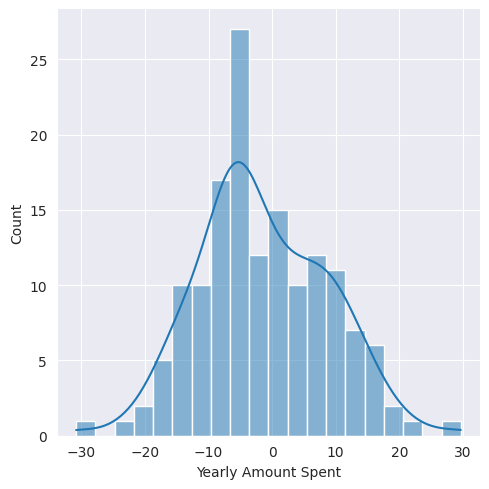

In [77]:
sns.displot(residuals,bins=20,kde=True)

this is likely normalized

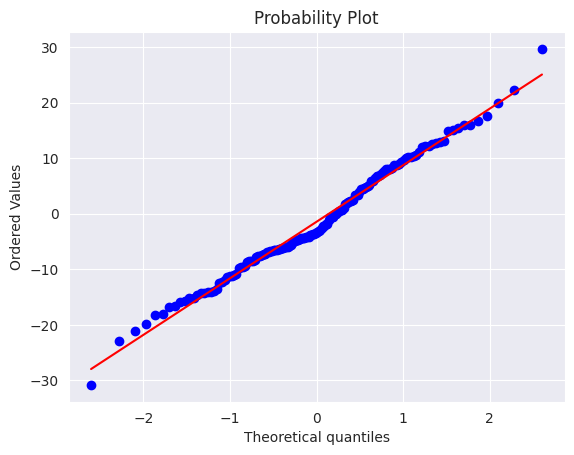

In [79]:
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

### Save the model

In [81]:
import joblib
joblib.dump(lm, "assets/linear_regression_model.pkl")

['./assets/linear_regression_model.pkl']